<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/ML_Rekognition_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crear configuración de API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

Primero hay que crear un fichero con la configuración de las claves de uusario de AWS.
Crear un usuario en el servicio IAM y crear un fichero .txt con esta estructura:

[default]

aws_access_key_id=

aws_secret_access_key=

[texto del enlace](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html)

Copiemos el fichero en una carpeta en nuestro Drive, activemos el drive y comencemos:

In [ ]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

Probar API con un ejemplo sencillo de análisis de sentimientos en una frase.
Para esto usaremos el servicio de Comprehend de AWS 

In [ ]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
text = "La izquierda es comunista"
comprehend.detect_sentiment(Text=text, LanguageCode='es')

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '161',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Wed, 27 Jul 2022 01:28:13 GMT',
   'x-amzn-requestid': '7a62cbfc-05b3-41c1-bf88-86d620bf0f16'},
  'HTTPStatusCode': 200,
  'RequestId': '7a62cbfc-05b3-41c1-bf88-86d620bf0f16',
  'RetryAttempts': 0},
 'Sentiment': 'MIXED',
 'SentimentScore': {'Mixed': 0.40807831287384033,
  'Negative': 0.36524713039398193,
  'Neutral': 0.21817032992839813,
  'Positive': 0.008504183031618595}}

## Análisis de imágenes

Vamos a utilizar el servicio Rekognition

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
rana='/content/drive/MyDrive/imagenes/ranadorada.jpg'
face='/content/drive/MyDrive/imagenes/ragnar.jpg'
fiesta='/content/drive/My Drive/Ejemplos R_Otros/Fotos/fiesta.jpg'
francia='/content/drive/MyDrive/imagenes/francia.jpg'
peñol='/content/drive/MyDrive/imagenes/el_peñol.jpg'
caballo='/content/drive/MyDrive/imagenes/caballo.jpg'
tomorrowland='/content/drive/MyDrive/imagenes/tomorrowland.jpg'
udea='/content/drive/MyDrive/imagenes/muralUdeA.jpg'
grupoI='/content/drive/MyDrive/imagenes/vikingos.jpg'
torrePiza='/content/drive/MyDrive/imagenes/torre-de-pisa-istock.jpg'
grupo='/content/drive/MyDrive/imagenes/vikings4.jpg'
messi = '/content/drive/MyDrive/imagenes/messi.jpg'

Se debe llamar al servicio ***rekognition***

In [ ]:
client = boto3.client(service_name='rekognition', region_name="us-east-2")

Hacer una función para leer la imagen en formato binario

In [ ]:
def openImage(file_image):
  with open(file_image, 'rb') as openfile:
    content = openfile.read()
  return content

### Detección de rostro

Para esto hay que tener en cuenta los datos que me dan.

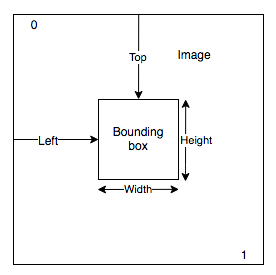

AWS en sus procesos rota las imágenes si ellas están rotadas

La biblioteca ***piexif*** me ayuda a saber si la imagen está rotada

`piexif.load(face)["0th"][piexif.ImageIFD.Orientation]` tendrá un número

*   3: 180º
*   6: 90º
*   8: 270º
*   1: 0º


In [ ]:
!pip install piexif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import piexif

In [ ]:
image=openImage(face)
response = client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])

In [ ]:
image=openImage(messi)
response2 = client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])

In [ ]:
##Coordenadas a la cara calculadas por la API de AWS
response['FaceDetails'][0]['BoundingBox']

{'Height': 0.6155060529708862,
 'Left': 0.3763083219528198,
 'Top': 0.11222559958696365,
 'Width': 0.23869118094444275}

In [ ]:
response

In [ ]:
for faceDetail in response['FaceDetails']:
  print('La edad está entre ' + str(faceDetail['AgeRange']['Low']) + ' y ' + str(faceDetail['AgeRange']['High']) + ' años')

La edad está entre 47 y 53 años


In [ ]:
import cv2
import matplotlib.pyplot as plt
img = plt.imread(messi)
img=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
imgWidth = img.shape[1]
imgHeight = img.shape[0]
box=response['FaceDetails'][0]['BoundingBox']
left = int(imgWidth * box['Left'])
top = int(imgHeight * box['Top'])
width = int(imgWidth * box['Width'])
height = int(imgHeight * box['Height'])
img=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),1)

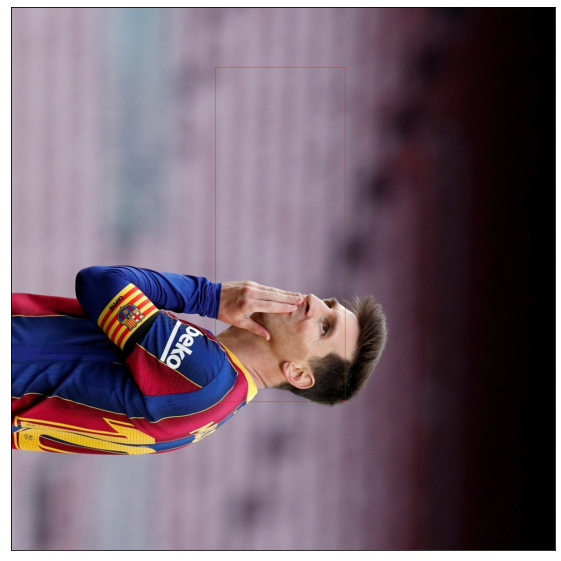

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = plt.imread(face)
#img=cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
imgWidth = img.shape[1]
imgHeight = img.shape[0]
box=response['FaceDetails'][0]['BoundingBox']
left = int(imgWidth * box['Left'])
top = int(imgHeight * box['Top'])
width = int(imgWidth * box['Width'])
height = int(imgHeight * box['Height'])
img=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),1)

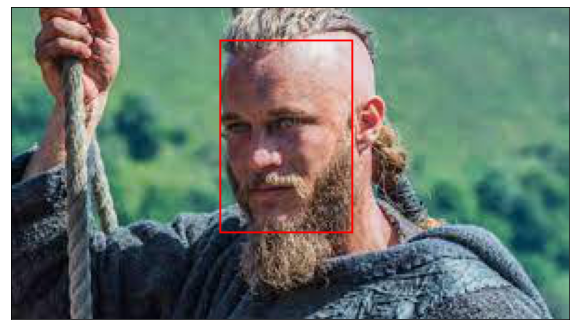

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Función para rotar la imagen si tiene el parámetro de rotación

In [ ]:
def rotate(filename):
  exif_dict = piexif.load(filename)
  img = plt.imread(filename)
  if piexif.ImageIFD.Orientation in exif_dict["0th"]:
      orientation = exif_dict["0th"][piexif.ImageIFD.Orientation]
      print(orientation)
      if orientation == 3:# 180 grados
          return cv2.rotate(img, cv2.ROTATE_180)
      elif orientation == 6: # 90 grados
          return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
      elif orientation == 8:#270
          return cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
      else:
          return img
  else:
      return img

In [ ]:
img = rotate(messi)

6


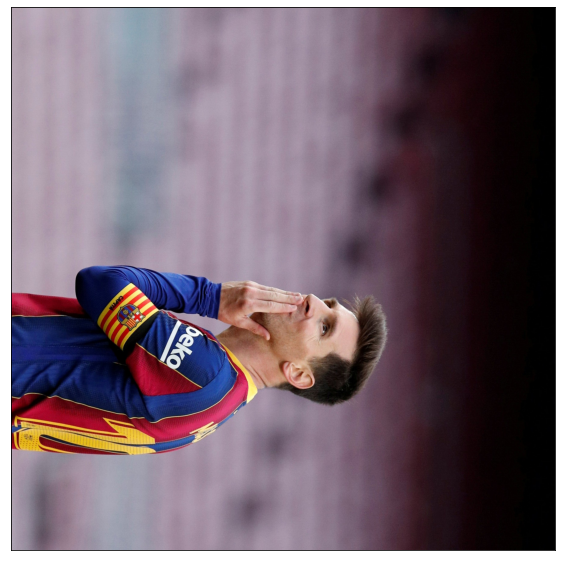

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Función para trazar un rectángulo en la zona detectada. Se le pasa la imagen y el box que contiene las coordenadas.

Esta nos puede servir para dibujar el rectángulo dada las coordenadas de detección de rostro o de objetos.

In [ ]:
def rectFace(img,box):
  imgWidth = img.shape[1]
  imgHeight = img.shape[0]
  left = int(imgWidth * box['Left'])
  top = int(imgHeight * box['Top'])
  width = int(imgWidth * box['Width'])
  height = int(imgHeight * box['Height'])
  img_rotate=cv2.rectangle(img,(left,top),(left+width,top+height),(255,0,0),1)
  return img, [left, top, left+width, top+height]

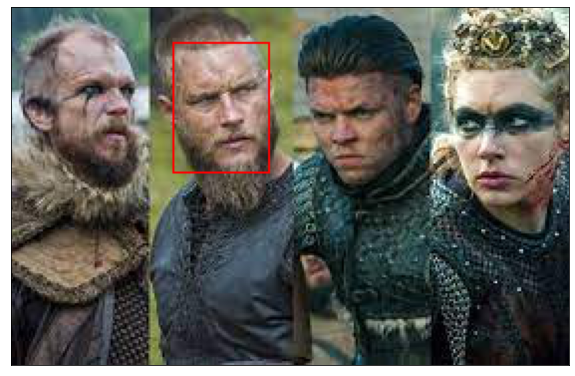

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Función para detectar rostros. Todos los rostros que sean detectados

In [ ]:
def detectface(client, filename):
  image=openImage(filename)
  response=client.detect_faces(Image={'Bytes': image}, Attributes=["ALL"])
  #img = plt.imread(filename)
  img = rotate(filename)
  faces=response['FaceDetails']
  for f in faces:
    box = f['BoundingBox']
    img,_=rectFace(img,box)
  return img 

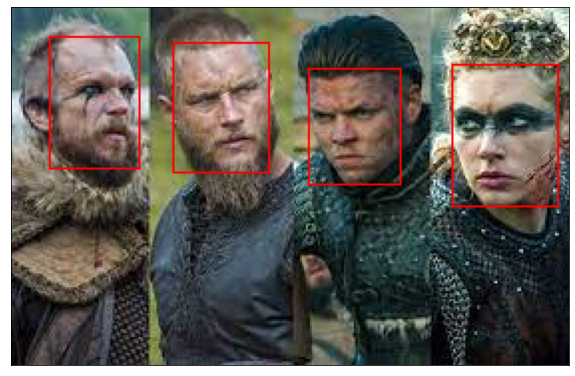

In [ ]:
plt.figure(figsize=(10,10))
img=detectface(client,grupoI)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

## Comparación de rostros

La función ***compare_face*** permite comparar un rostro de una imagen pasada en el parámtro *SourceImage*, en otra imagen pasada como parámetro en *TargetImage*

In [ ]:
image1=openImage(face)
image2=openImage(grupoI)
response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})

In [ ]:
image1=openImage(face)
image3=openImage(grupo)
response=client.compare_faces(TargetImage={'Bytes': image3}, SourceImage={'Bytes': image1})

In [ ]:
faces=response['FaceMatches']
box=response['FaceMatches'][0]['Face']['BoundingBox']
img = rotate(grupo)
img,_=rectFace(img,box)

Función para encontrar el rostro de la imagen *SourceImage*

In [ ]:
def compareFaces(fileSource, fileTarget):
  image1=openImage(fileSource)
  image2=openImage(fileTarget)
  response=client.compare_faces(TargetImage={'Bytes': image2}, SourceImage={'Bytes': image1})
  faces=response['FaceMatches']
  box=response['FaceMatches'][0]['Face']['BoundingBox']
  image1=rotate(fileSource)
  img = rotate(fileTarget)
  img,_=rectFace(img,box)
  return image1,img

([], <a list of 0 Text major ticklabel objects>)

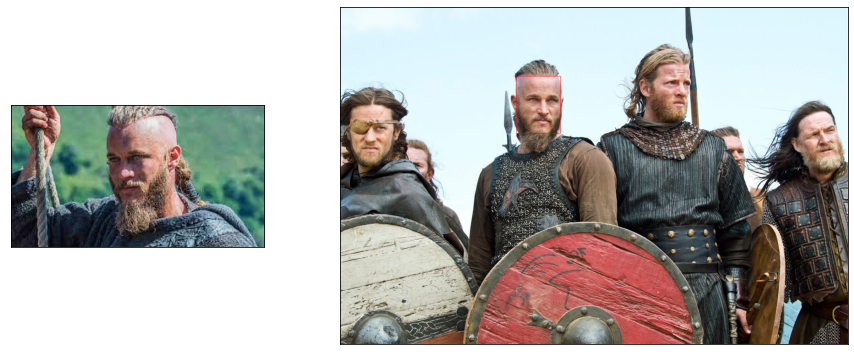

In [ ]:
from matplotlib import gridspec
img1,img2=compareFaces(face, grupo)
plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
#plt.subplot(1, 2, 1)
plt.subplot(gs[0])
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
#plt.subplot(1, 2, 2)
plt.subplot(gs[1])
plt.imshow(img2)
plt.xticks([])
plt.yticks([])

## Detección de objetos

In [ ]:
image=openImage(torrePiza)
response = client.detect_labels(Image={'Bytes': image})

In [ ]:
labels=[(e['Name'], e['Confidence']) for e in response['Labels']]
for e in labels:
  print(e)

('Grass', 99.48076629638672)
('Plant', 99.48076629638672)
('Person', 97.88816833496094)
('Human', 97.88816833496094)
('Architecture', 92.5418930053711)
('Building', 92.5418930053711)
('Tower', 91.27558898925781)
('Monument', 89.42150115966797)
('Bell Tower', 80.62347412109375)
('Lawn', 75.4640884399414)
('Urban', 62.46144485473633)
('Outdoors', 57.42018127441406)
('Spire', 57.294395446777344)
('Steeple', 57.294395446777344)
('Tree', 57.098480224609375)
('Field', 57.02150344848633)


In [ ]:
def detectobjects(filename):
  image=openImage(filename)
  response = client.detect_labels(Image={'Bytes': image})
  img=rotate(filename)
  for l in response['Labels']:
    name=l['Name']
    for i in l['Instances']:
      box=i['BoundingBox']
      img,v=rectFace(img,box)
      img=cv2.putText(img, name, (v[0],v[1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1, cv2.LINE_AA)
  return img

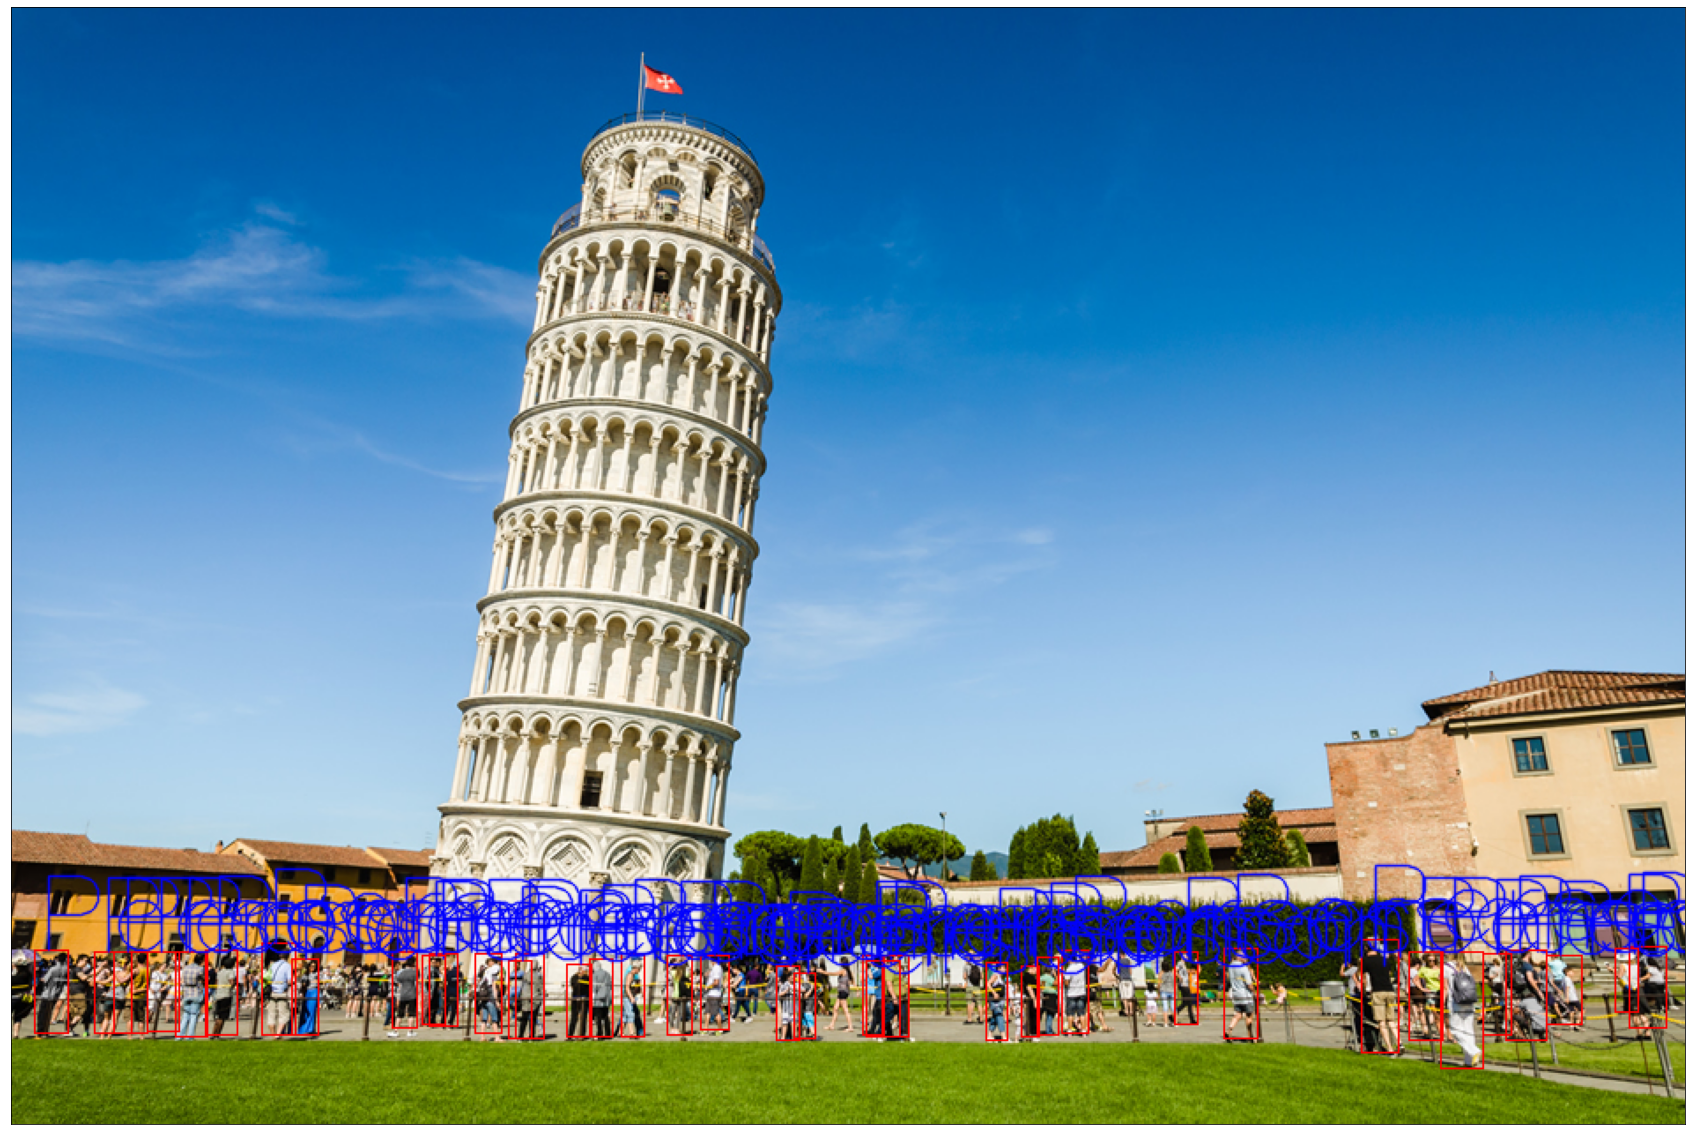

In [ ]:
img=detectobjects(torrePiza)
plt.figure(figsize=(30,30))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [ ]:
image=openImage(udea)
response = client.detect_text(Image={'Bytes': image})

In [ ]:
def detectText(filename):
  image=openImage(filename)
  response = client.detect_text(Image={'Bytes': image})
  img=rotate(filename)
  detection=response['TextDetections']
  texts=[t['DetectedText'] for t in detection]
  for i,t in enumerate(detection):
    text=t['DetectedText']
    box=t['Geometry']['BoundingBox']
    img,v=rectFace(img,box)
    img=cv2.putText(img, str(i), (v[0],v[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
  return img,texts

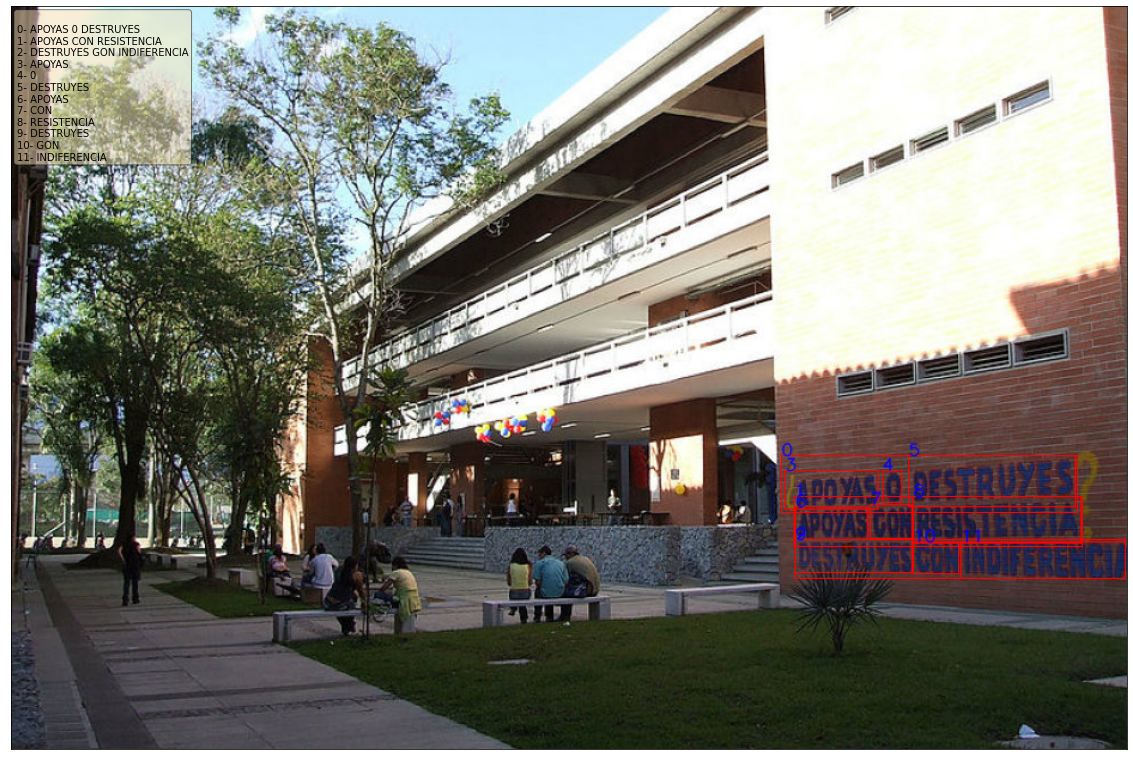

In [ ]:
img,texts=detectText(udea)
t=''
for i,e in enumerate(texts):
  t = t+'\n'+str(i)+'- '+ e
plt.figure(figsize=(20,20))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(5, 5, t, fontsize=10,verticalalignment='top', bbox=props)
plt.xticks([])
plt.yticks([])
plt.imshow(img)